In [24]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os
from myshow import myshow

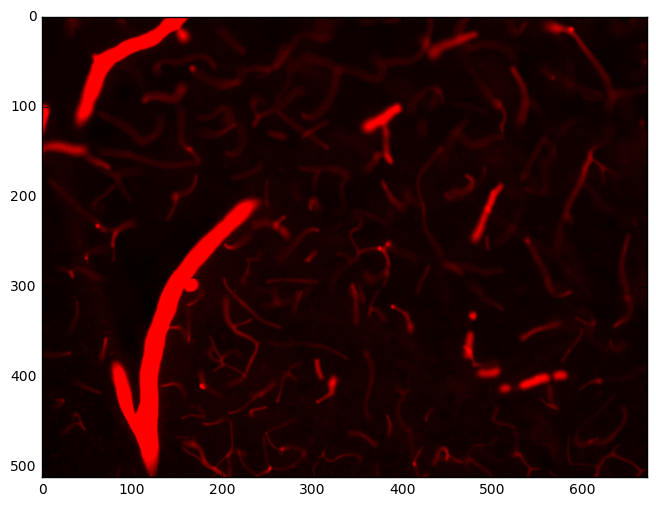

In [9]:
img = sitk.ReadImage(os.path.join("..", "data", "confocal_stack.tif"))
myshow(img)

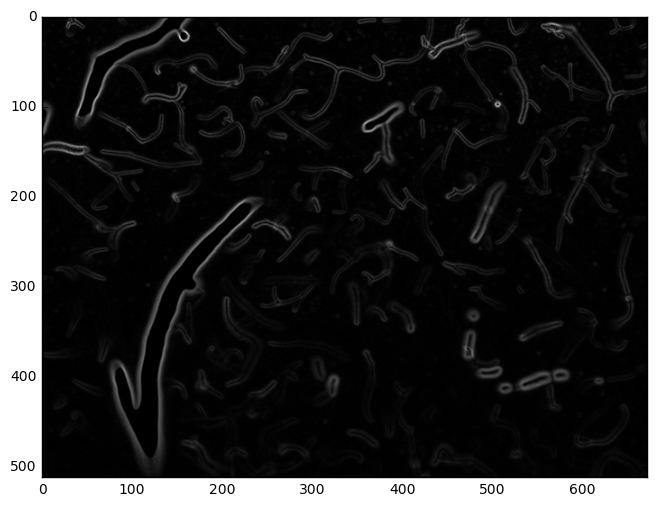

In [27]:
arr_float = sitk.GetArrayFromImage(img).astype(np.float32)
print(arr_float.shape)
img_float = sitk.GetImageFromArray(np.mean(arr_float, 3))
feature_img = sitk.GradientMagnitude(img_float)
myshow(feature_img)

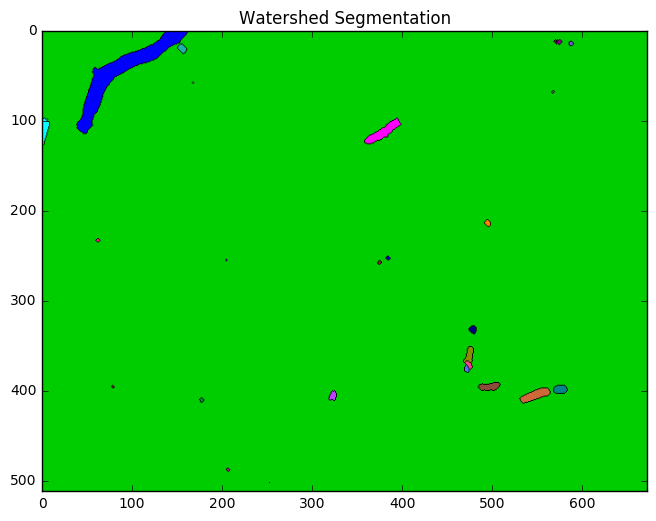

In [28]:
ws_img = sitk.MorphologicalWatershed(feature_img, level=4, 
                                     markWatershedLine=True, 
                                     fullyConnected=False)
myshow(sitk.LabelToRGB(ws_img), "Watershed Segmentation")


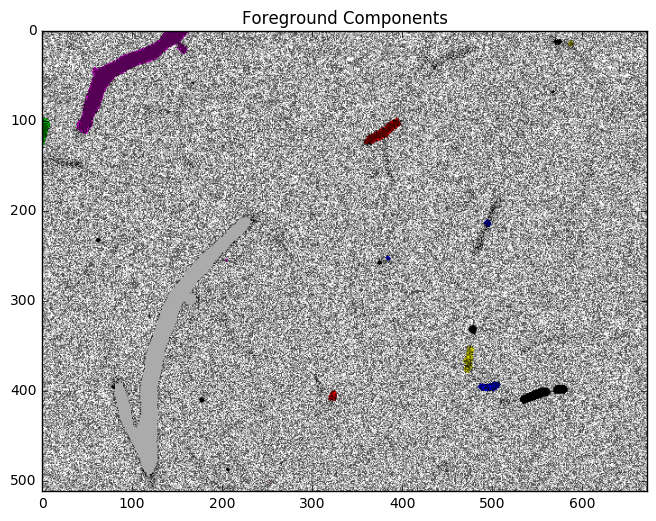

In [31]:
seg = sitk.ConnectedComponent(ws_img!=ws_img[0,0,0])
myshow(sitk.LabelOverlay(img_float, seg), "Foreground Components")